In [47]:
import numpy as np
import pandas as pd

In [48]:
data = [10,15,20,20,25,30,30,30,40,100]

In [49]:
df = pd.Series(data)

In [50]:
df.describe()

count     10.000000
mean      32.000000
std       25.407785
min       10.000000
25%       20.000000
50%       27.500000
75%       30.000000
max      100.000000
dtype: float64

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

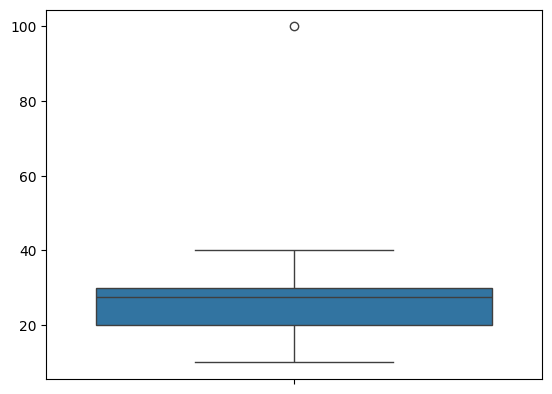

In [52]:
sns.boxplot(df)

In [53]:
np.mean(df),np.median(df),df.mode()

(32.0,
 27.5,
 0    30
 dtype: int64)

<Axes: ylabel='Count'>

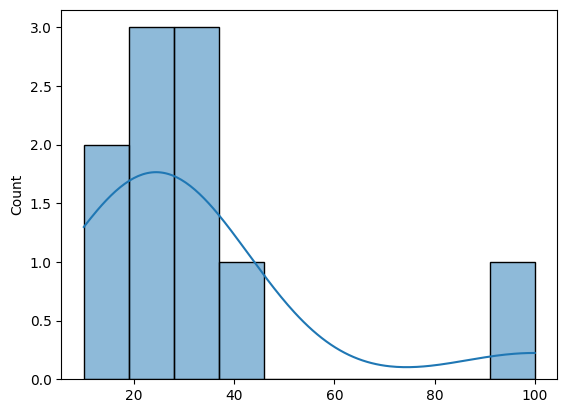

In [54]:
sns.histplot(df,kde = True)

<Axes: ylabel='Density'>

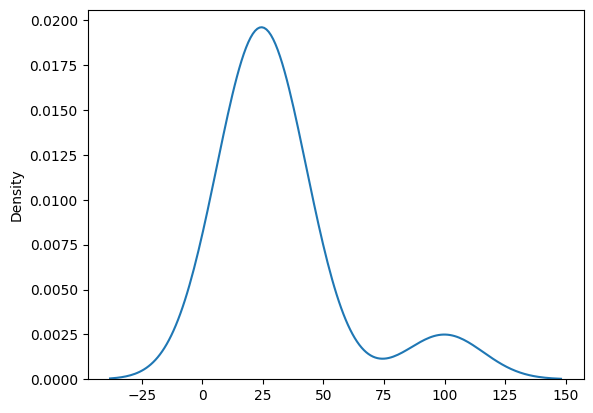

In [55]:
sns.kdeplot(df)

In [56]:
np.var(df),np.std(df, ddof=1)

(581.0, 25.407785333546006)

In [57]:
np.mean(df)-2*np.std(df, ddof=1),np.mean(df)+2*np.std(df, ddof=1)

(-18.81557066709201, 82.815570667092)

In [58]:
data

[10, 15, 20, 20, 25, 30, 30, 30, 40, 100]

In [59]:
data1 = {
    "Month":pd.date_range(start = "2023-01-01",periods =  12, freq = "ME"),
    "Sales":[200,220,250,230,260,280,300,310,290,320,330,340]
}

In [60]:
df1 = pd.DataFrame(data1)

In [61]:
df1

,Month,Sales
0,2023-01-31,200
1,2023-02-28,220
2,2023-03-31,250
3,2023-04-30,230
4,2023-05-31,260
5,2023-06-30,280
6,2023-07-31,300
7,2023-08-31,310
8,2023-09-30,290
9,2023-10-31,320


In [62]:
df1.describe()

,Month,Sales
count,12,12.000000
mean,2023-07-15 22:00:00,277.500000
min,2023-01-31 00:00:00,200.000000
25%,2023-04-22 12:00:00,245.000000
50%,2023-07-15 12:00:00,285.000000
75%,2023-10-07 18:00:00,312.500000
max,2023-12-31 00:00:00,340.000000
std,NaN,45.552168


<Axes: ylabel='Count'>

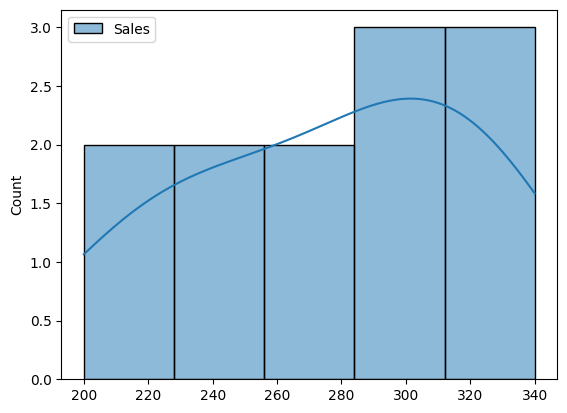

In [63]:
sns.histplot(df1,kde = True)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
#!pip install scikit-learn

In [66]:
X = np.array(df1.index).reshape(-1,1)
y = df1["Sales"]
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [67]:
next_3_months = np.array([12,13,14]).reshape(-1,1)
predicted_sales = model.predict(next_3_months)
predicted_sales

array([356.81818182, 369.02097902, 381.22377622])

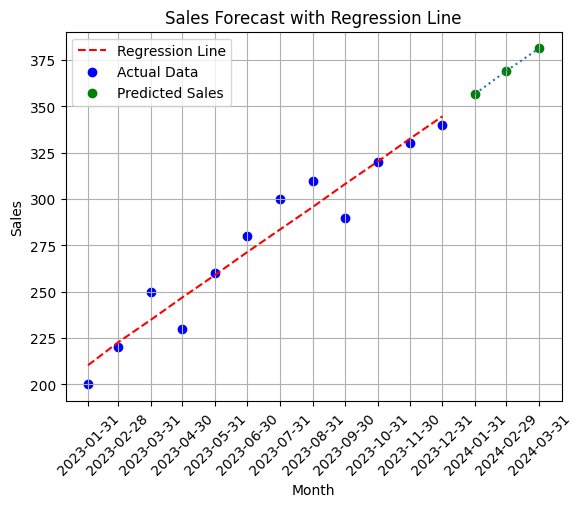

In [68]:
# regression line (fitted line over actual months)

y_predicted_line = model.predict(X)
plt.plot(df1["Month"],y_predicted_line,color = "red",linestyle = "--",label = "Regression Line")

plt.scatter(df1["Month"],df1["Sales"], color = "blue",label = "Actual Data")
next_3_months_date = pd.date_range(start = "2024-01-01",periods = 3, freq = "ME")
# future sales
plt.scatter(next_3_months_date,predicted_sales,color = "green",label = "Predicted Sales")

plt.plot(next_3_months_date,predicted_sales,linestyle = ":")

plt.xticks(pd.date_range(start = "2023-01-01",periods = 15, freq = "ME"),rotation = 45)

plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales Forecast with Regression Line")
plt.legend()
plt.grid()
plt.show()